# Feature selection and classifying in mobile price data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]

In [5]:
best_features = SelectKBest(score_func=chi2,k=10)

In [6]:
fit = best_features.fit(X,Y)

In [7]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [8]:
features = pd.concat([df_columns,df_scores],axis=1)

In [9]:
features.columns = ["Features","Scores"]
features.head()

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [10]:
features = features.sort_values(by="Scores",ascending=False)
features #sorted features according to the relevance score of them with the price of mobile 
#now we can take top 10 or top 5 features for better model accuracy

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier()

In [13]:
fit = model.fit(X,Y)

In [14]:
feature_importance = pd.DataFrame(fit.feature_importances_,index=X.columns,columns=["Importance"])

In [15]:
feature_importance.head()

,Importance
battery_power,0.075185
blue,0.006244
clock_speed,0.025925
dual_sim,0.006339
fc,0.023795


In [16]:
feature_importance = feature_importance.sort_values(by="Importance",ascending=False)

In [17]:
feature_importance.head()

,Importance
ram,0.502222
battery_power,0.075185
px_width,0.057268
px_height,0.056776
mobile_wt,0.037875


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


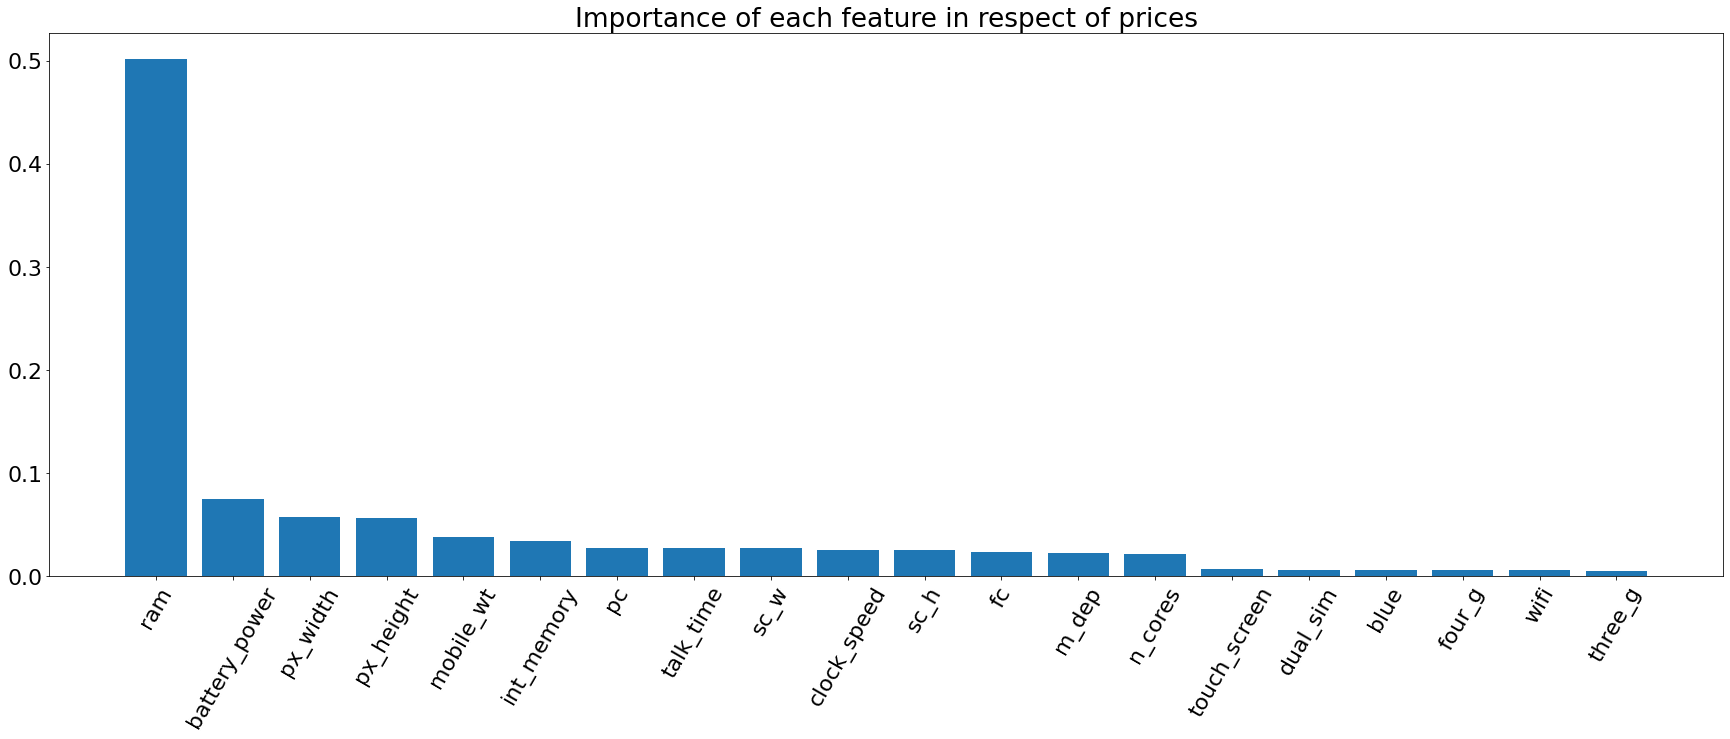

In [18]:
plt.figure(figsize=(30,10))
font = {'family' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
plt.xticks(rotation=60)
plt.bar(feature_importance.index,feature_importance['Importance'])
plt.title("Importance of each feature in respect of prices")
plt.show()

## Correlation with price 

In [19]:
data_corr = data.corr()
data_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [20]:
import seaborn as sns

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


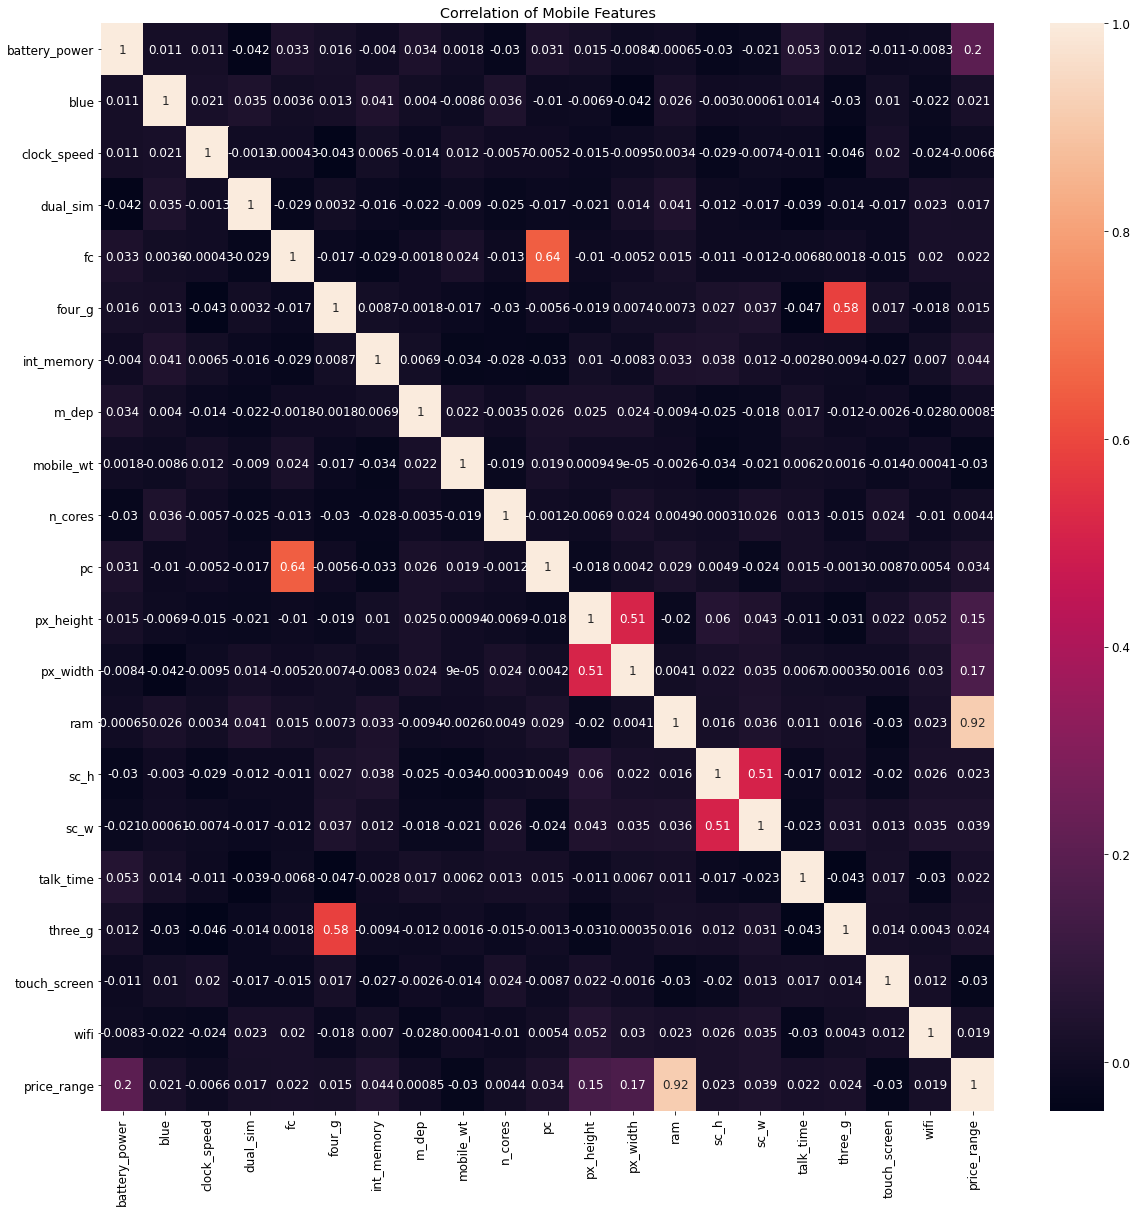

In [21]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 12})
plt.title("Correlation of Mobile Features")
plt.xticks(rotation=60)
sns.heatmap(data_corr,annot=True)
plt.show()

## Check Model Performance

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
rfc = RandomForestClassifier()

In [24]:
cross_score = cross_val_score(rfc,X,Y,cv=10)

In [25]:
performance = cross_score.mean()*100

In [26]:
print("Performance with all features : " + str(performance))

Performance with all features : 88.25


In [27]:
important_features = features.iloc[:5,0].values
important_features

array(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt'],
      dtype=object)

In [28]:
X[important_features]

,ram,px_height,battery_power,px_width,mobile_wt
0,2549,20,842,756,188
1,2631,905,1021,1988,136
2,2603,1263,563,1716,145
3,2769,1216,615,1786,131
4,1411,1208,1821,1212,141
...,...,...,...,...,...
1995,668,1222,794,1890,106
1996,2032,915,1965,1965,187
1997,3057,868,1911,1632,108
1998,869,336,1512,670,145


In [29]:
new_cross_score = cross_val_score(rfc,X[important_features],Y,cv=10)
new_performance = new_cross_score.mean()*100

In [30]:
print("Performance with only important features : " + str(new_performance))

Performance with only important features : 92.25000000000001
